<a href="https://colab.research.google.com/github/bondpy202212/AI_projects/blob/main/4_CNN_in_CV_with_Real_world_Images(Cats_vs_Dogs_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [1]:
import os
import shutil
import zipfile

import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

**Download the dataset from its original source**\
https://www.kaggle.com/c/dogs-vs-cats/data

In [2]:
!wget --no-check-certificate \
    -q "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

**Unzip the dataset, /tmp/PetImages directory**

In [3]:
local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

**Check out this catalog**

In [4]:
source_path = '/tmp/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')

# Deletes all non-image files (there are two .db files bundled into the dataset)
!find /tmp/PetImages/ -type f ! -name "*.jpg" -exec rm {} +

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12500 images of dogs.
There are 12500 images of cats.


**Create a directory for cats-v-dogs, and subdirectories for training and validation.**

In [5]:
# Define root directory
root_dir = '/tmp/cats-v-dogs'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)


def create_train_val_dirs(root_path):
  """
  Creates directories for the train and test sets

  Args:
    root_path (string) - the base directory path to create subdirectories from

  Returns:
    None
  """

  path_tcats = root_dir + '/training/cats'
  os.makedirs(path_tcats)

  path_vcats = root_dir + '/validation/cats'
  os.makedirs(path_vcats)

  path_tdogs = root_dir + '/training/dogs'
  os.makedirs(path_tdogs)

  path_vdogs = root_dir + '/validation/dogs'
  os.makedirs(path_vdogs)


try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

**Test "create_train_val_dirs" function**

In [6]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/cats-v-dogs/validation
/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/validation/cats
/tmp/cats-v-dogs/validation/dogs
/tmp/cats-v-dogs/training/cats
/tmp/cats-v-dogs/training/dogs


**Divide the data into training and test sests**

In [7]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets

  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training

  Returns:
    None
  """

  # Get a list of all files in the SOURCE_DIR
  files = os.listdir(SOURCE_DIR)
  # Remove files with zero length from consideration
  valid_files = [file for file in files if os.path.getsize(os.path.join(SOURCE_DIR, file)) > 0 ]
  for file in files:
    if os.path.getsize(os.path.join(SOURCE_DIR, file)) > 0:
      pass
    else:
      print(f"{file} is zero length, so ignoring.")

  # Randomly shuffle the list of valid files
  random.shuffle(valid_files)
  # Calculate the split index
  split_index = int(SPLIT_SIZE * len(valid_files))

  # Split the files into training and validation sets
  training_files = valid_files[:split_index]
  validation_files = valid_files[split_index:]

  # Copy files to the training directory
  for file in training_files:
      source_file = os.path.join(SOURCE_DIR, file)
      destination_file = os.path.join(TRAINING_DIR, file)
      shutil.copy(source_file, destination_file)

  # Copy files to the validation directory
  for file in validation_files:
      source_file = os.path.join(SOURCE_DIR, file)
      destination_file = os.path.join(VALIDATION_DIR, file)
      shutil.copy(source_file, destination_file)

**Test "split_data" function**

In [8]:
# Define paths
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
VALIDATION_DIR = "/tmp/cats-v-dogs/validation/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

# Check that the number of images matches the expected output

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


Original cat's directory has 12500 images
Original dog's directory has 12500 images

There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation


**Creates the training and validation data generators**

In [9]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators

  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images

  Returns:
    train_generator, validation_generator - tuple containing the generators
  """

  # Instantiate the ImageDataGenerator class
  train_datagen = ImageDataGenerator( rescale = 1.0 / 255.0)

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=150,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class
  validation_datagen = ImageDataGenerator( rescale = 1.0 / 255.0)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=150,
                                                                class_mode='binary',
                                                                target_size=(150, 150))

  return train_generator, validation_generator

**Test the generators**

In [10]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


**Create a model to be trained.**

In [11]:
def create_model():

  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer=RMSprop(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model

**Train the model**

In [13]:
# Get the untrained model
model = create_model()

# Train the model
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 66s 364ms/step - accuracy: 0.5734 - loss: 0.7171 - val_accuracy: 0.6536 - val_loss: 0.6041
Epoch 2/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 49s 315ms/step - accuracy: 0.7049 - loss: 0.5673 - val_accuracy: 0.7280 - val_loss: 0.5424
Epoch 3/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 48s 307ms/step - accuracy: 0.7474 - loss: 0.5105 - val_accuracy: 0.6812 - val_loss: 0.5641
Epoch 4/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 82s 306ms/step - accuracy: 0.7722 - loss: 0.4725 - val_accuracy: 0.7644 - val_loss: 0.4824
Epoch 5/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 49s 312ms/step - accuracy: 0.7973 - loss: 0.4286 - val_accuracy: 0.8012 - val_loss: 0.4297
Epoch 6/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 48s 309ms/step - accuracy: 0.8231 - loss: 0.3866 - val_accuracy: 0.7980 - val_loss: 0.4450
Epoch 7/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 48s 310ms/step - accuracy: 0.8474 - loss: 0.3434 - val_accuracy: 0.7944 - val_loss: 0.4374
Epoch 8/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 51s 324ms/step - accuracy: 0.8672 - loss: 0

**Accuracy and loss of results on the training and test datasets for each training epoch**

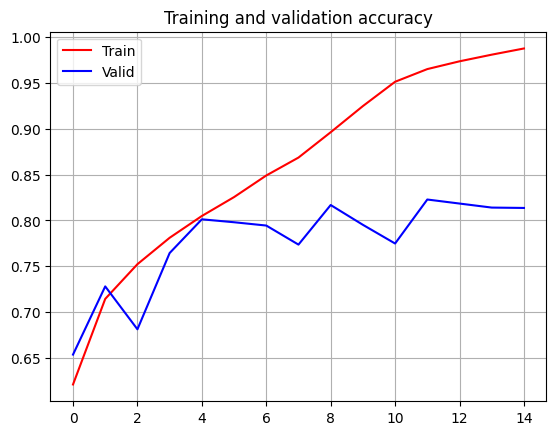

<Figure size 640x480 with 0 Axes>

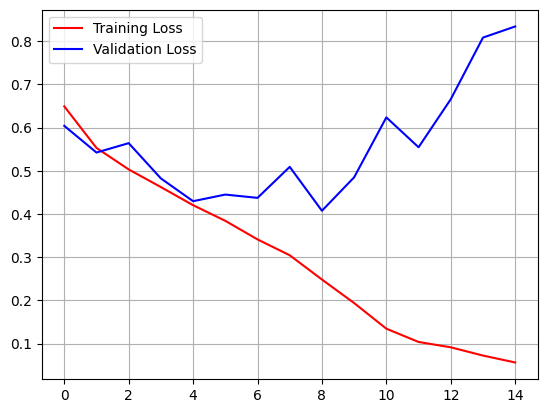

<Figure size 640x480 with 0 Axes>

In [14]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs



# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label="Train")
plt.plot(epochs, val_acc, 'b', label="Valid")
plt.title('Training and validation accuracy')
plt.grid('True')
plt.legend()
plt.figure()
plt.show()
print("")

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.grid('True')
plt.legend()
plt.figure()
plt.show()